<a href="https://colab.research.google.com/github/filipecorreiabelfort/Trabalho-de-vis-o-Computacional_5_redes_trasnferlearning/blob/main/5_Transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import glob
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

X_content = np.load("/content/drive/MyDrive/NCA/ODIR-5K/X_odir_5k_N_D_G.npy") # array de imagens carregadas
Y = np.load("/content/drive/MyDrive/NCA/ODIR-5K/Y_odir_5k_N_D_G.npy")

print(len(X_content))
print(Y)

2107
[0 0 1 ... 1 0 1]


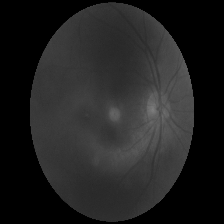

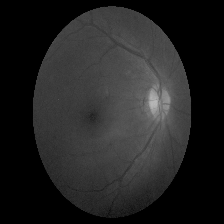

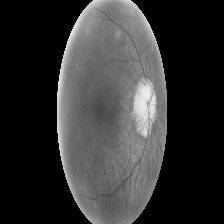

In [3]:
def convert_to_grayscale_rgb(images):
    grayscale_images = []

    for image in images:
        # Converte a imagem para escala de cinza
        grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Replica o canal cinza três vezes para obter um formato RGB
        rgb_image = cv2.merge([grayscale] * 3)

        grayscale_images.append(rgb_image)

    return np.array(grayscale_images)

# Exemplo de uso
# Suponha que X seja o seu array de imagens
# Certifique-se de que suas imagens tenham o formato (altura, largura, canais)
# Se as imagens estiverem em escala de cinza, adicione um canal para torná-las (altura, largura, 1)
X = convert_to_grayscale_rgb(X_content)

cv2_imshow(X[0])
cv2_imshow(X[2])
cv2_imshow(X[3])

In [4]:


def apply_clahe(image):
    # Convertendo a imagem RGB para YUV
    yuv_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

    # Separando os canais Y, U e V
    y, u, v = cv2.split(yuv_image)

    # Aplicando o CLAHE no canal Y (luminância)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    y_clahe = clahe.apply(y)

    # Juntando os canais YUV atualizados
    yuv_image_clahe = cv2.merge([y_clahe, u, v])

    # Convertendo de YUV de volta para RGB
    rgb_image_clahe = cv2.cvtColor(yuv_image_clahe, cv2.COLOR_YUV2RGB)
    return rgb_image_clahe


def bilateral_filter(image, d=5, sigma_color=75, sigma_space=75):

    # Aplicar o filtro bilateral
    filtered_image = cv2.bilateralFilter(image, d, sigma_color, sigma_space)

    return filtered_image




X_preprocess = []
for i in range(len(X)):
  image = apply_clahe(X[i])
  X_preprocess.append(image)

XTrain: 1474
Xtest: 507
Xval: 126
yTrain: 1474
ytest: 507
yval: 126


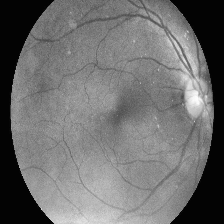

0


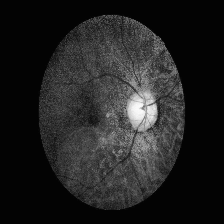

0


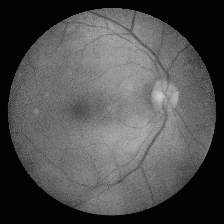

0


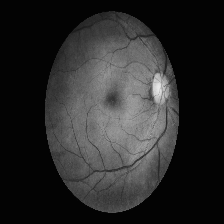

1


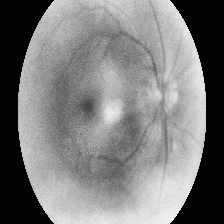

1


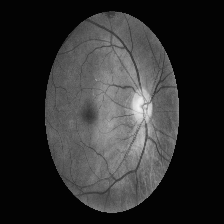

0


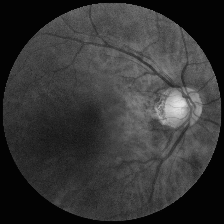

0


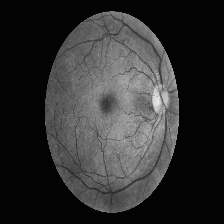

1


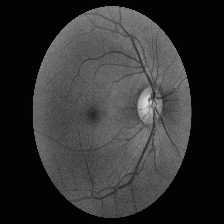

0


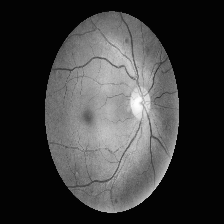

1


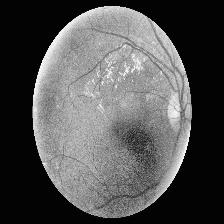

1


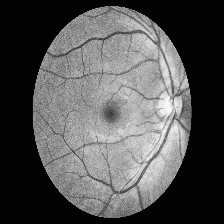

0


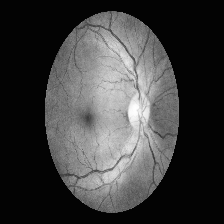

0


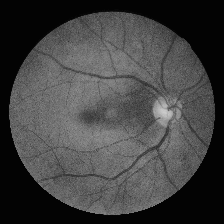

1


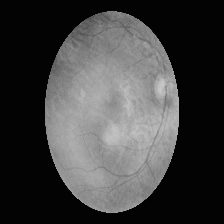

2


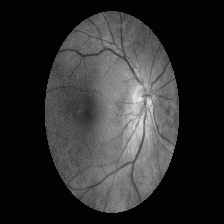

1


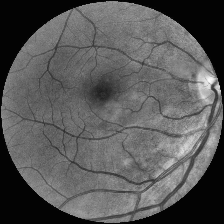

0


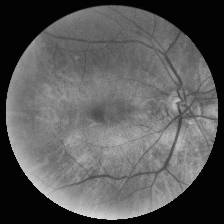

0


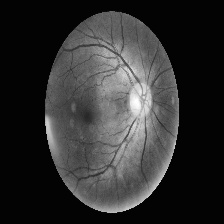

0


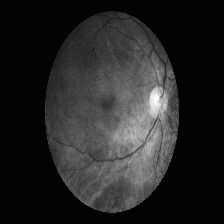

0


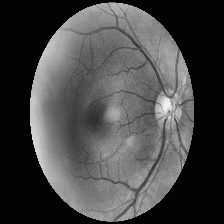

1


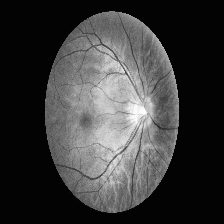

1


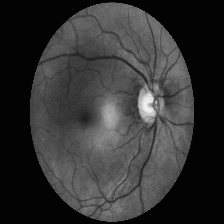

0


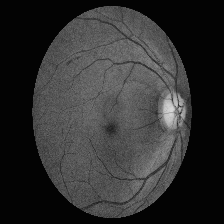

1


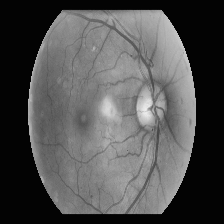

0


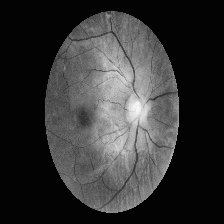

0


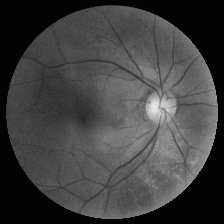

1


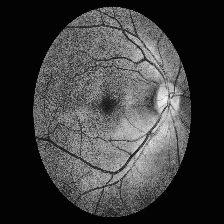

0


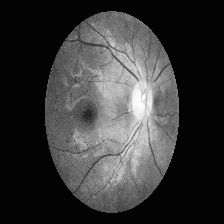

1


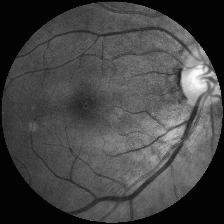

0


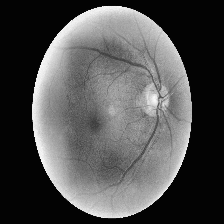

0


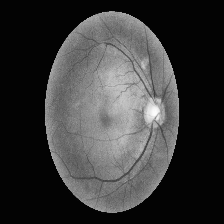

1


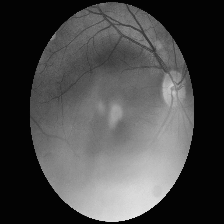

0


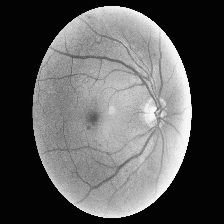

1


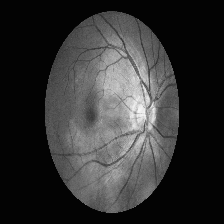

0


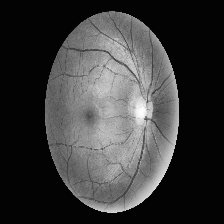

1


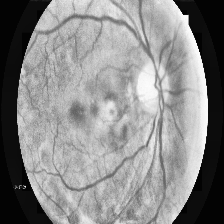

1


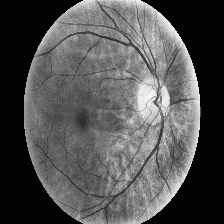

0


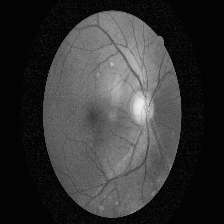

0


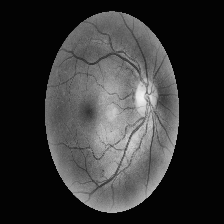

1


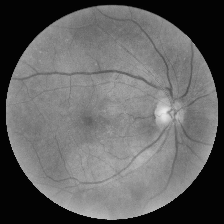

0


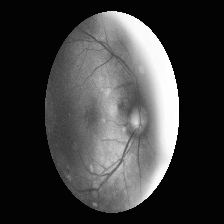

1


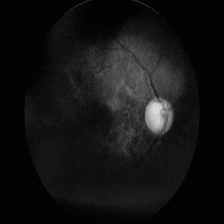

2


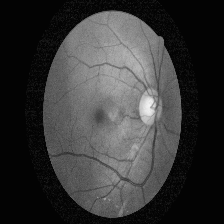

1


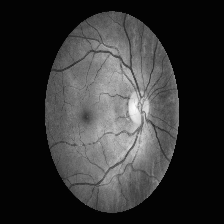

0


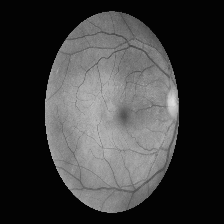

0


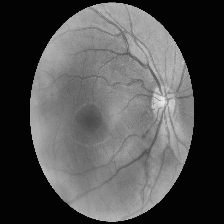

0


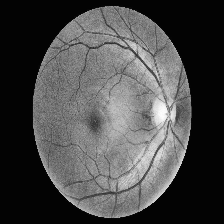

0


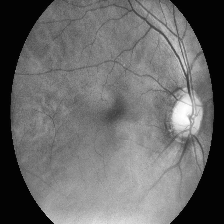

0


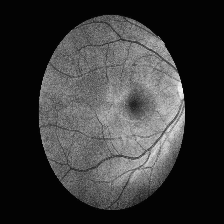

0


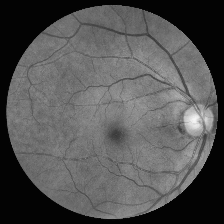

0


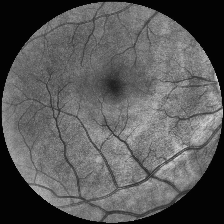

0


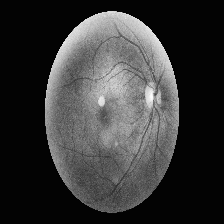

0


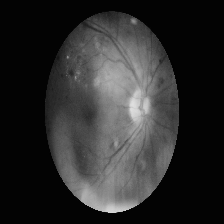

1


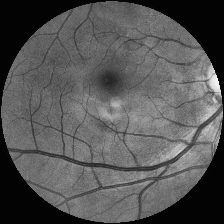

0


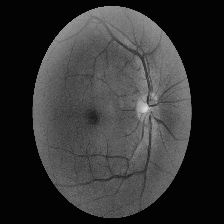

0


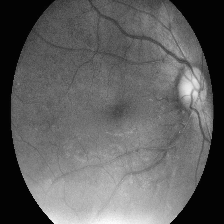

1


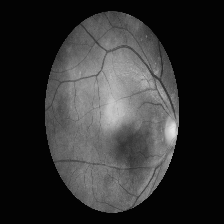

0


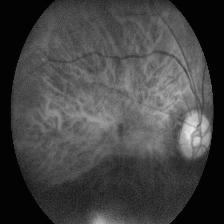

0


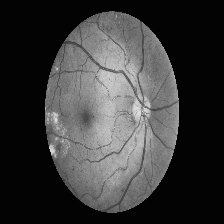

1


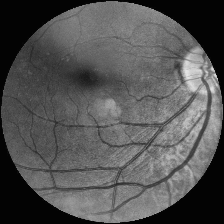

0


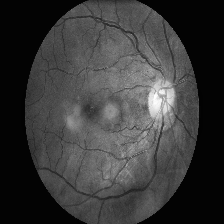

0


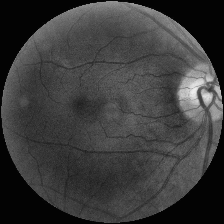

1


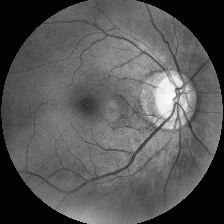

0


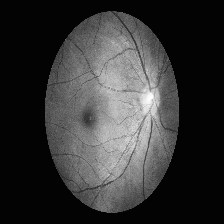

0


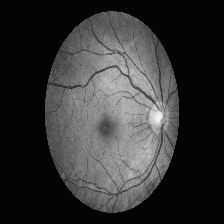

1


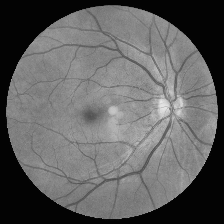

1


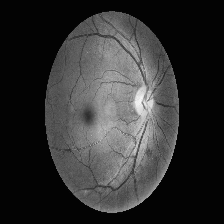

1


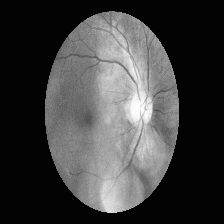

0


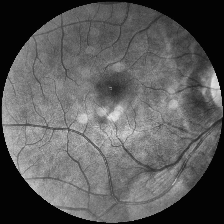

0


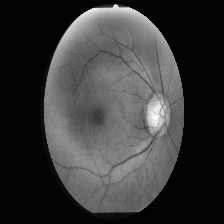

0


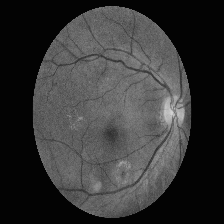

1


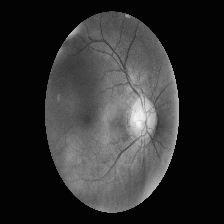

0


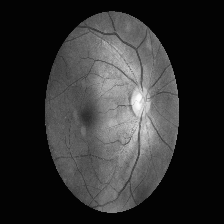

0


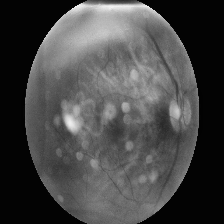

0


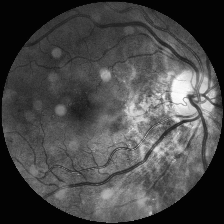

1


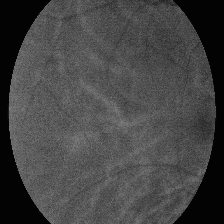

0


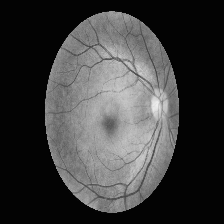

0


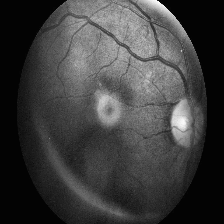

0


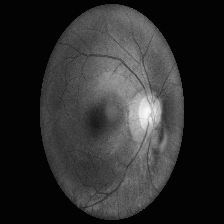

2


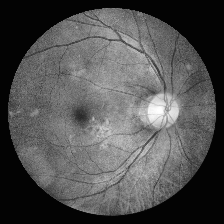

1


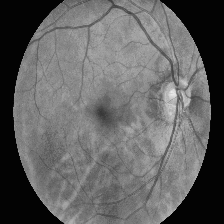

0


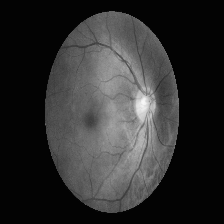

0


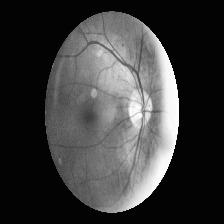

1


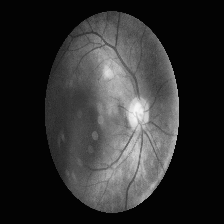

1


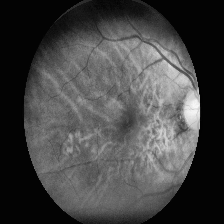

0


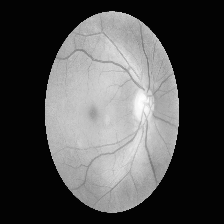

1


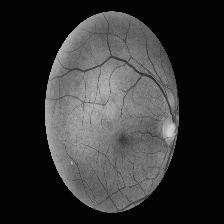

0


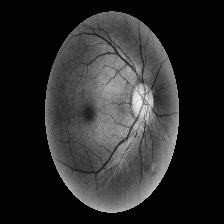

1


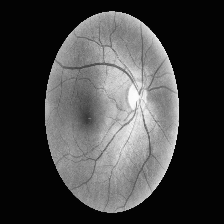

0


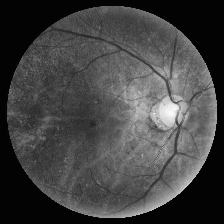

0


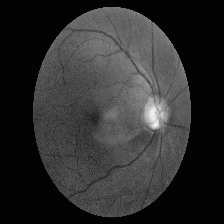

2


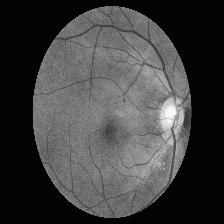

1


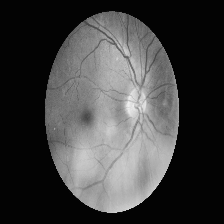

0


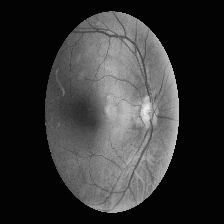

1


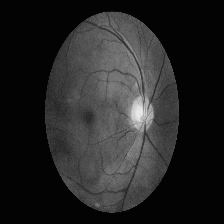

0


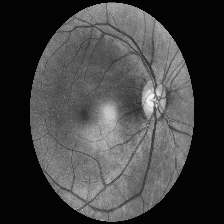

0


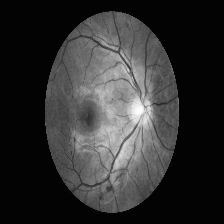

1


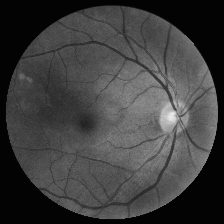

0


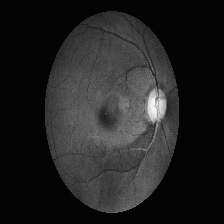

2


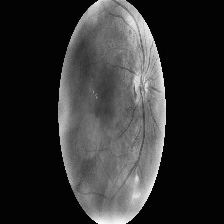

1


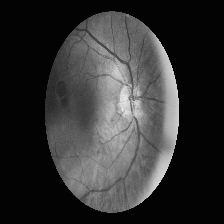

0


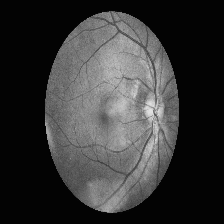

1


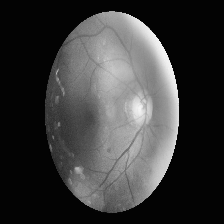

1


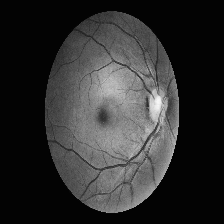

0


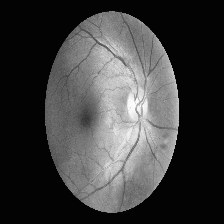

0


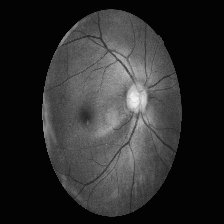

2


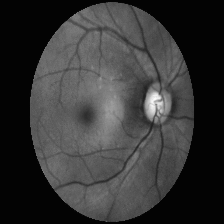

0


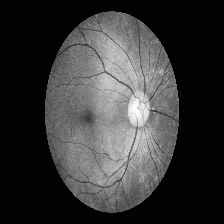

0


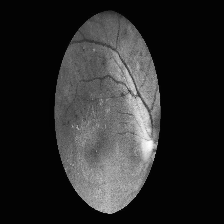

1


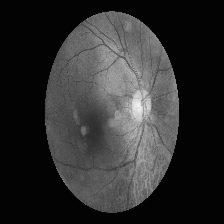

0


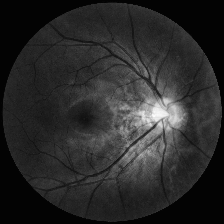

0


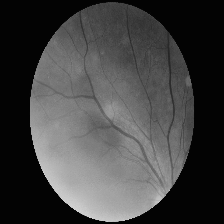

0


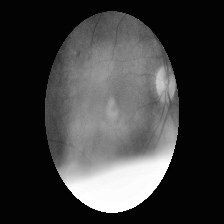

1


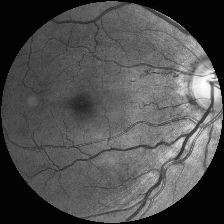

0


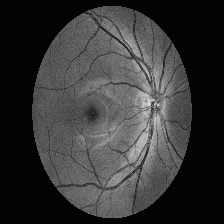

0


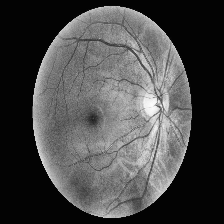

1


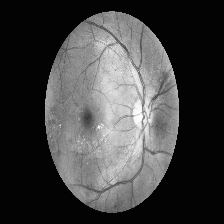

1


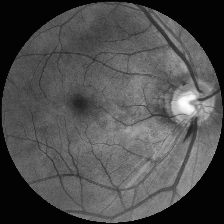

0


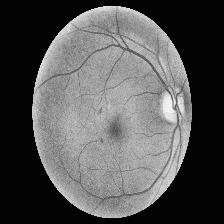

1


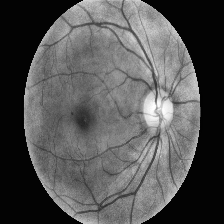

1


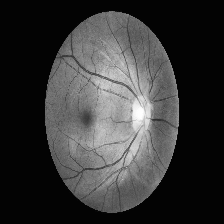

0


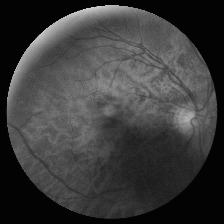

0


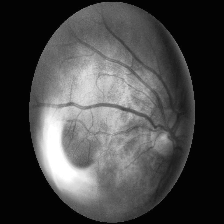

0


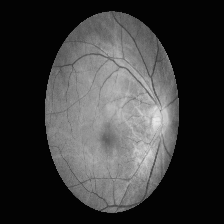

0


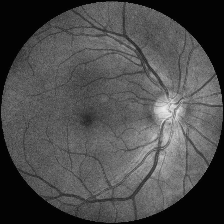

0


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X_preprocess, Y, test_size=0.3, random_state=42)


# Divisão do treino teste e validação
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.80, random_state=42)


print(f"XTrain: {len(x_train)}")
print(f"Xtest: {len(x_test)}")
print(f"Xval: {len(x_val)}")

print(f"yTrain: {len(y_train)}")
print(f"ytest: {len(y_test)}")
print(f"yval: {len(y_val)}")


x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)

for i in range(len(x_val)):
  cv2_imshow(x_val[i])
  print(y_val[i])


In [6]:
#DATA AUGMENTATION
import random

def data_augmentation(image):
    # Escolhe aleatoriamente entre rotação, flip vertical e flip horizontal
    augmentation_type = random.choice(['rotate'])

    if augmentation_type == 'rotate':
        # Gera um ângulo aleatório entre -30 e 30 graus para a rotação
        angle = random.uniform(-100, 100)
        # Obtém a altura e largura da imagem
        height, width = image.shape[:2]
        # Calcula o ponto central da imagem
        center = (width // 2, height // 2)
        # Cria uma matriz de rotação
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        # Aplica a rotação na imagem
        augmented_image = cv2.warpAffine(image, rotation_matrix, (width, height))


    return augmented_image


def data_aug_application(X, Y):
  data_aug = []
  y_aug = []
  for i in range(len(X)):
    if (Y[i] == 1) or (Y[i] == 2):
      for j in range(3):
       imgd = data_augmentation(X[i])
       #cv2_imshow(X[i])
       #cv2_imshow(imgd)

       data_aug.append(imgd)
       y_aug.append(Y[i])
    else:
       data_aug.append(X[i])
       y_aug.append(Y[i])

  return data_aug, y_aug



newX, newY = data_aug_application(x_train, y_train)
x_val, y_val = data_aug_application(x_val,y_val)
print(f"tamanho do treino: {len(newX)}")
print(f"tamanho do treino: {len(newY)}")

y_trains = y_train.tolist()
cont_0 = y_trains.count(0)
cont_1 = y_trains.count(1)
cont_2 = y_trains.count(2)

contn_0 = newY.count(0)
contn_1 = newY.count(1)
contn_2 = newY.count(2)

print("new class valors:")
print(cont_0)
print(cont_1)
print(cont_2)

print("Old class valors:")
print(contn_0)
print(contn_1)
print(contn_2)



tamanho do treino: 2462
tamanho do treino: 2462
new class valors:
980
434
60
Old class valors:
980
1302
180


In [7]:
#TESTANDO EM UM CLASSIFICADOR

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

newX = np.array(newX)
newY = np.array(newY)

x_val = np.array(x_val)
newX = newX / 255
x_test = x_test / 255
x_val = x_val / 255

"""
# Criando um classificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=5)

newx = newX.reshape((newX.shape[0], -1))
X_tests = x_test.reshape((x_test.shape[0], -1))
# Treinando o classificador
rf_classifier.fit(newx, newY)

# Fazendo previsões
y_pred = rf_classifier.predict(X_tests)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))"""

'\n# Criando um classificador Random Forest\nrf_classifier = RandomForestClassifier(n_estimators=50, random_state=5)\n\nnewx = newX.reshape((newX.shape[0], -1))\nX_tests = x_test.reshape((x_test.shape[0], -1))\n# Treinando o classificador\nrf_classifier.fit(newx, newY)\n\n# Fazendo previsões\ny_pred = rf_classifier.predict(X_tests)\n\n# Avaliando o desempenho do modelo\naccuracy = accuracy_score(y_test, y_pred)\nprint(f\'Acurácia: {accuracy}\')\n\n# Relatório de classificação\nprint("\nRelatório de Classificação:")\nprint(classification_report(y_test, y_pred))\n\n# Matriz de confusão\nprint("\nMatriz de Confusão:")\nprint(confusion_matrix(y_test, y_pred))'

In [8]:
import tensorflow as tf
from keras.applications import EfficientNetV2B1
from keras import layers, models
from keras.models import load_model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten, MaxPooling2D

input_shape = newX.shape[1:]  # Obtém o formato da entrada
num_classes = len(set(newY))  # Obtém o número de classes

print(num_classes)

base_model = EfficientNetV2B1(include_top=False, weights='imagenet', input_shape=input_shape, )

base_model.trainable=False

checkpoint = ModelCheckpoint('/content/drive/MyDrive/NCA/ODIR-5K/efficientnetb1.keras',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)


model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# We unfreeze the top 20 layers while leaving BatchNorm layers frozen
for layer in model.layers[-20:]:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
print(newY)
print(y_val)

y_val = np.array(y_val)

# Treinando o modelo
model.fit(newX, newY,
          epochs=20,
          validation_data=(x_val, y_val),
          batch_size=32,
          callbacks=[checkpoint])

# Avaliando o desempenho do modelo nos dados de teste


model = load_model("/content/drive/MyDrive/NCA/ODIR-5K/efficientnetb1.keras")
accuracy = model.evaluate(x_test, y_test)[1]
print(f'Acurácia do modelo nos dados de teste: {accuracy}')

# Avaliando com model.predict
y_pred = model.predict(x_test)

# Outras métricas de avaliação
from sklearn.metrics import classification_report, confusion_matrix

# Convertendo as probabilidades para classes
y_pred_classes = []
y_pred_classes = tf.argmax(y_pred, axis=1)


# Imprimindo o vetor de predição e o vetor de teste
print("Vetor de Predição:")
print(y_pred_classes)

print("\nVetor de Teste:")
print(y_test)

# Relatório de classificação e matriz de confusão
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_classes))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_classes))

3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b1 (Functio  (None, 7, 7, 1280)        6931124   
 nal)                                                            
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
